<a href="https://colab.research.google.com/github/jfunicamp/jfunicamp/blob/main/C%C3%B3pia_de_pycalphad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/pycalphad/pycalphad
!cd pycalphad
!pip install -U pip setuptools
!pip install -U -r requirements-dev.txt


fatal: destination path 'pycalphad' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements-dev.txt'


In [ ]:
!pip install -U pycalphad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


In [ ]:
import os
print(os.path.abspath(os.curdir))

/content


In [ ]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycalphad 0.10.1 requires matplotlib>=3.3, but you have matplotlib 3.1.3 which is incompatible.


In [ ]:
import matplotlib.pyplot as plt

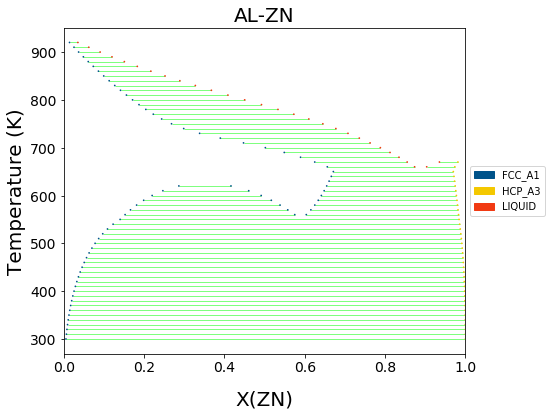

In [ ]:
from pycalphad import Database, binplot
import pycalphad.variables as v

# Load database and choose the phases that will be considered
db_alzn = Database('/content/drive/MyDrive/Pycalphad/alzn_mey.tdb')
my_phases_alzn = ['LIQUID', 'FCC_A1', 'HCP_A3']

# Create a matplotlib Figure object and get the active Axes
fig = plt.figure(figsize=(9,6))
axes = fig.gca()

# Compute the phase diagram and plot it on the existing axes using the `plot_kwargs={'ax': axes}` keyword argument
binplot(db_alzn, ['AL', 'ZN', 'VA'] , my_phases_alzn, {v.X('ZN'):(0,1,0.02), v.T: (300, 1000, 10), v.P:101325, v.N: 1}, plot_kwargs={'ax': axes})

plt.show()


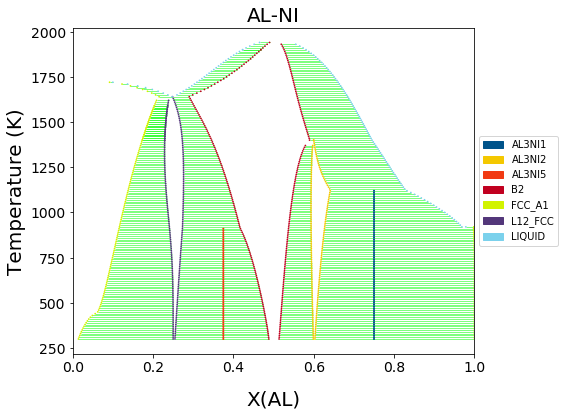

In [ ]:
from pycalphad import Database, binplot
import pycalphad.variables as v

# Load database
dbf = Database('/content/drive/MyDrive/Pycalphad/NI_AL_DUPIN_2001.TDB')
# Set the components to consider, including vacanies (VA) explictly.
comps = ['AL', 'NI', 'VA']
# Get all the phases in the database programatically
phases = list(dbf.phases.keys())
# Create the dictionary of conditions
conds = {
    v.N: 1, v.P: 101325,
    v.T: (300, 2000, 10),  # (start, stop, step)
    v.X('AL'): (1e-5, 1, 0.02),   # (start, stop, step)
}

# Create a matplotlib Figure object and get the active Axes
fig = plt.figure(figsize=(9,6))
axes = fig.gca()

# Plot by passing in all the variables
binplot(dbf, comps, phases, conds, plot_kwargs={'ax': axes})

plt.show()

In [ ]:
from pycalphad import Database, binplot, equilibrium, calculate
import pycalphad.variables as v

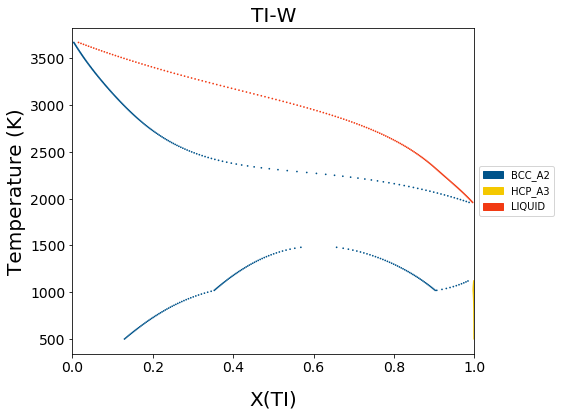

In [ ]:
# Load database
dbf = Database('/content/drive/MyDrive/Pycalphad/TiMoW.TDB')
# Set the components to consider, including vacanies (VA) explictly.
comps = ['TI', 'W', 'VA']
# Get all the phases in the database programatically
phases = list(dbf.phases.keys())
# Create the dictionary of conditions
conds = {
    v.N: 1, v.P: 101325,
    v.T: (500, 3700, 10),  # (start, stop, step)
    v.X('TI'): (1e-5, 1, 0.02),   # (start, stop, step)
}

# Create a matplotlib Figure object and get the active Axes
fig = plt.figure(figsize=(9,6))
axes = fig.gca()

# Plot by passing in all the variables
binplot(dbf, comps, phases, conds, plot_kwargs={'ax': axes,'tielines': False})

plt.show()

In [ ]:
from pycalphad.core.calculate import calculate
from pycalphad.core.equilibrium import equilibrium
# Load database
dbf = Database('/content/drive/MyDrive/Pycalphad/TiMoW.TDB')
# Set the components to consider, including vacanies (VA) explictly.
comps = ['TI', 'W', 'VA']
# Get all the phases in the database programatically
phases = sorted(dbf.phases.keys())
# Create the dictionary of conditions
conds = {
    v.N: 1, v.P: 101325,
    v.T: (500, 3700, 1),  # (start, stop, step)
    v.X('TI'): (0.5),   # (start, stop, step)
}

# Create a matplotlib Figure object and get the active Axes


# Plot by passing in all the variables
eq = equilibrium(dbf, comps, phases, conds, output='GM')
#print(eq)


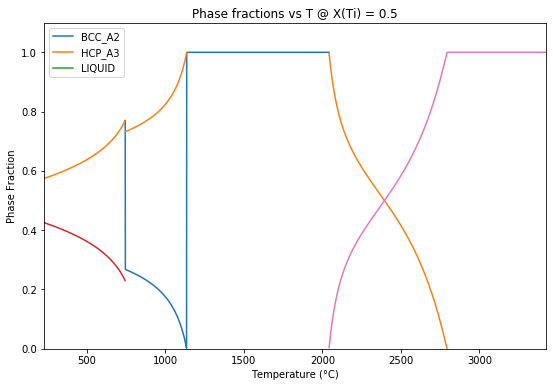

In [ ]:
import numpy as np
from pycalphad.plot.utils import phase_legend
phases = sorted(set(eq.Phase.values.flatten()) - {''})

fig = plt.figure(figsize=(9,6))
ax = fig.gca()
phase_handles, phasemap = phase_legend(phases)
ax.set_title('Phase fractions vs T @ X(Ti) = 0.5')
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Phase Fraction')
ax.set_ylim((0,1.1))
ax.set_xlim((500-273.15, 3700-273.15))

for name in phases:
#    ax.plot(np.squeeze(eq.T.broadcast_like(eq.NP)-273.15), np.squeeze(eq.NP.where(eq.Phase == name)),
#             color=phasemap[name], label=name)
    ax.plot(np.squeeze(eq.T.broadcast_like(eq.NP)-273.15), np.squeeze(eq.NP.where(eq.Phase == name)),
            label=name)
plt.gca().legend(phasemap, loc='best')

In [ ]:
phases

['BCC_A2', 'HCP_A3', 'LIQUID']

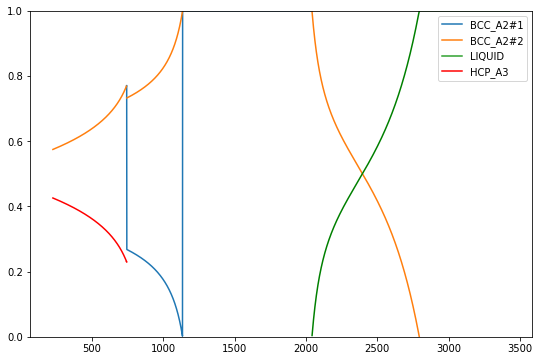

In [ ]:
x=np.squeeze(eq.T.broadcast_like(eq.NP)-273.15)
y=np.squeeze(eq.NP.where(eq.Phase == 'BCC_A2'))
w=np.squeeze(eq.NP.where(eq.Phase == 'HCP_A3'))
z=np.squeeze(eq.NP.where(eq.Phase == 'LIQUID'))
fig = plt.figure(figsize=(9,6))
plt.plot(x, y, label='BCC_A2')
plt.plot(x, w, color='r', label='HCP_A3')
plt.plot(x, z, color='g', label='LIQUID')
plt.legend(['BCC_A2#1', 'BCC_A2#2', "LIQUID", 'HCP_A3'])
#plt.legend()
plt.ylim(0, 1)
plt.show()

In [ ]:
dbf = Database('/content/drive/MyDrive/Pycalphad/TiMoW.TDB')
# Set the components to consider, including vacanies (VA) explictly.
comps = ['TI', 'W', 'VA']
# Get all the phases in the database programatically
phases = sorted(dbf.phases.keys())
# Create the dictionary of conditions
conds = {
    v.N: 1, v.P: 101325,
    v.T: (500, 3700, 5),  # (start, stop, step)
    v.X('TI'): (1e-5, 1, 0.02),   # (start, stop, step)
}

# Create a matplotlib Figure object and get the active Axes


# Plot by passing in all the variables
eq1 = equilibrium(dbf, comps, phases, conds, output='GM')
#print(eq)

In [ ]:
x=np.squeeze(eq1.T.broadcast_like(eq1.NP)-273.15)
y=np.squeeze(eq1.NP.where(eq1.Phase == 'BCC_A2'))

In [ ]:
eq1.X_TI

<xarray.DataArray 'X_TI' (X_TI: 50)>
array([1.0000e-05, 2.0010e-02, 4.0010e-02, 6.0010e-02, 8.0010e-02, 1.0001e-01,
       1.2001e-01, 1.4001e-01, 1.6001e-01, 1.8001e-01, 2.0001e-01, 2.2001e-01,
       2.4001e-01, 2.6001e-01, 2.8001e-01, 3.0001e-01, 3.2001e-01, 3.4001e-01,
       3.6001e-01, 3.8001e-01, 4.0001e-01, 4.2001e-01, 4.4001e-01, 4.6001e-01,
       4.8001e-01, 5.0001e-01, 5.2001e-01, 5.4001e-01, 5.6001e-01, 5.8001e-01,
       6.0001e-01, 6.2001e-01, 6.4001e-01, 6.6001e-01, 6.8001e-01, 7.0001e-01,
       7.2001e-01, 7.4001e-01, 7.6001e-01, 7.8001e-01, 8.0001e-01, 8.2001e-01,
       8.4001e-01, 8.6001e-01, 8.8001e-01, 9.0001e-01, 9.2001e-01, 9.4001e-01,
       9.6001e-01, 9.8001e-01])
Coordinates:
  * X_TI     (X_TI) float64 1e-05 0.02001 0.04001 0.06001 ... 0.94 0.96 0.98

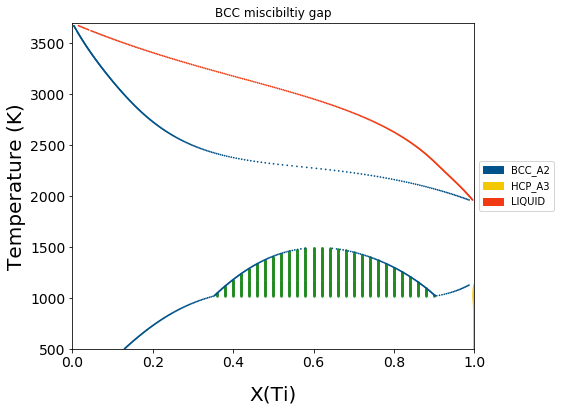

In [ ]:
mask_cond = eq1.Phase.isin('BCC_A2').sum(dim='vertex') == 2
X_TI = eq1.X_TI.where(mask_cond).transpose(*mask_cond.dims)
T = eq1.T.where(mask_cond).transpose(*mask_cond.dims)

fig = plt.figure(figsize=(9,6))
axes = fig.gca()

binplot(dbf, comps, phases, conds, plot_kwargs={'ax': axes,'tielines': False})
plt.scatter(X_TI, T, c='forestgreen', s=2, label='miscibility gap')

plt.title('BCC miscibiltiy gap')
plt.xlabel('X(Ti)')
plt.ylabel('Temperature (K)')

plt.xlim(0, 1)
plt.ylim(conds[v.T][0], conds[v.T][1])

plt.show()


In [ ]:
from pycalphad import Database, binplot, equilibrium, calculate
import pycalphad.variables as v
import matplotlib.pyplot as plt
import numpy as np
from pycalphad.plot.utils import phase_legend

In [ ]:
dbf=Database('/content/drive/MyDrive/Pycalphad/todos-binarios-al-SET-2021.TDB')
# Set the components to consider, including vacanies (VA) explictly.
comps = ['TI', 'MO', 'NB', 'W', 'CU', 'VA']
# Get all the phases in the database programatically
phases = sorted(dbf.phases.keys())
#phases=['HCP_A3','BCC_A2','LIQUID']
# Create the dictionary of conditions
conds = {
    v.N: 1, v.P: 101325,
    v.T: (500, 2800, 5),  # (start, stop, step)
    v.X('TI'): (0.225), v.X('MO'): (0.225), v.X('NB'): (0.225), v.X('W'): (0.225)   # (start, stop, step)
}

# Create a matplotlib Figure object and get the active Axes


# Plot by passing in all the variables
eq1 = equilibrium(dbf, comps, phases, conds, calc_opts={'pdens':20}, output='GM')
#print(eq)



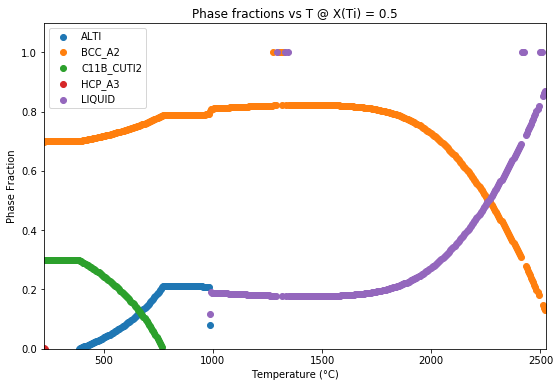

In [ ]:
phases = sorted(set(eq1.Phase.values.flatten()) - {''})
# Create a matplotlib Figure object and get the active Axes
# Plot by passing in all the variables

fig = plt.figure(figsize=(9,6))
ax = fig.gca()
phase_handles, phasemap = phase_legend(phases)
ax.set_title('Phase fractions vs T @ X(Ti) = 0.5')
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Phase Fraction')
ax.set_ylim((0,1.1))
ax.set_xlim((500-273.15, 2800-273.15))

for name in phases:
#    ax.scatter(np.squeeze(eq1.T.broadcast_like(eq1.NP)-273.15), np.squeeze(eq1.NP.where(eq1.Phase == name)),
#             color=phasemap[name], label=name)
    ax.scatter(np.squeeze(eq1.T.broadcast_like(eq1.NP)-273.15), np.squeeze(eq1.NP.where(eq1.Phase == name)),
            label=name)
plt.gca().legend(phasemap, loc='best')

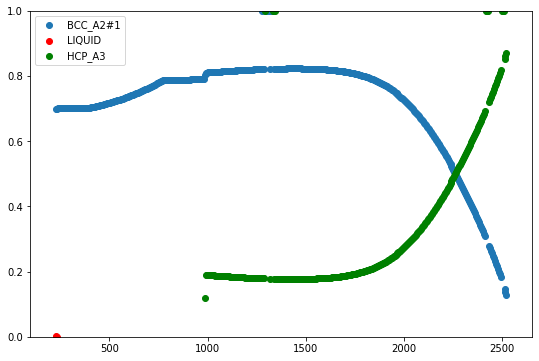

In [ ]:
x=np.squeeze(eq1.T.broadcast_like(eq1.NP)-273.15)
y=np.squeeze(eq1.NP.where(eq1.Phase == 'BCC_A2'))
w=np.squeeze(eq1.NP.where(eq1.Phase == 'HCP_A3'))
z=np.squeeze(eq1.NP.where(eq1.Phase == 'LIQUID'))
fig = plt.figure(figsize=(9,6))
plt.scatter(x, y, label='BCC_A2')
plt.scatter(x, w, color='r', label='HCP_A3')
plt.scatter(x, z, color='g', label='LIQUID')
plt.legend(['BCC_A2#1', "LIQUID", 'HCP_A3'])
#plt.legend()
plt.ylim(0, 1)
plt.show()

In [ ]:
dbf=Database('/content/drive/MyDrive/Pycalphad/todos-binarios-al-SET-2021.TDB')
comps = ['NB', 'CU', 'VA']
# Get all the phases in the database programatically
phases = sorted(dbf.phases.keys())
#phases=a
#['HCP_A3','BCC_A2','LIQUID']
#phases = sorted(set(eq1.Phase.values.flatten()) - {''})
# Create the dictionary of conditions
conds = {
    v.N: 1, v.P: 101325,
    v.T: (2700, 3700, 5),  # (start, stop, step)
    v.X('NB'): (1e-5, 1, 0.01),   # (start, stop, step)
}
mask_cond = eq1.Phase.isin('BCC_A2').sum(dim='vertex') == 2
X_TI = eq1.X_TI.where(mask_cond).transpose(*mask_cond.dims)
T = eq1.T.where(mask_cond).transpose(*mask_cond.dims)

fig = plt.figure(figsize=(9,6))
axes = fig.gca()

binplot(dbf, comps, phases, conds, plot_kwargs={'ax': axes,'tielines': False})

#plt.scatter(X_TI, T, c='forestgreen', s=2, label='miscibility gap')

plt.title('BCC miscibiltiy gap')
plt.xlabel('X(Ti)')
plt.ylabel('Temperature (K)')

plt.xlim(0, 1)
plt.ylim(conds[v.T][0], conds[v.T][1])

plt.show()

In [ ]:
comps = ['TI', 'MO', 'VA']
# Get all the phases in the database programatically
#phases = sorted(dbf.phases.keys())
phases=['HCP_A3','BCC_A2','LIQUID']
# Create the dictionary of conditions
conds = {
    v.N: 1, v.P: 101325,
    v.T: (500, 3500, 5),  # (start, stop, step)
    v.X('TI'): (1e-5, 1, 0.01),   # (start, stop, step)
}
mask_cond = eq1.Phase.isin('BCC_A2').sum(dim='vertex') == 2
X_TI = eq1.X_TI.where(mask_cond).transpose(*mask_cond.dims)
T = eq1.T.where(mask_cond).transpose(*mask_cond.dims)

fig = plt.figure(figsize=(9,6))
axes = fig.gca()

#binplot(dbf, comps, phases, conds, plot_kwargs={'ax': axes,'tielines': False})

plt.scatter(X_TI, T, c='forestgreen', s=2, label='miscibility gap')

plt.title('BCC miscibiltiy gap')
plt.xlabel('X(Ti)')
plt.ylabel('Temperature (K)')

plt.xlim(0, 1)
plt.ylim(conds[v.T][0], conds[v.T][1])

plt.show()